In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Loading the dataset
DataSet = pd.read_csv(r"C:\Users\khera\OneDrive\Documents\TRISHUL\train_data.csv")
DataSet

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0,1,...,-0.6,0.6,0.354176,0.290966,0.020772,0.176219,0.216899,_1054_,"[1, 0]",_NEG_
10232,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0,0,...,0.0,0.0,0.189920,0.077568,0.050404,0.196092,0.410885,_2910_,"[1, 0]",NaN
10233,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4,11,...,-0.4,0.4,0.119778,0.206043,0.152902,0.095003,0.220693,_540_,"[0, 1]",_NEG_
10234,2253.json,FALSE,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3,1,...,0.0,0.0,0.113820,0.066778,0.312947,0.242768,0.084354,_376_,"[0, 1]",NaN


#### Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10236 entries, 0 to 10235
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    10236 non-null  object 
 1   label                 10236 non-null  object 
 2   statement             10236 non-null  object 
 3   subject               10236 non-null  object 
 4   speaker               10236 non-null  object 
 5   speaker_job           7342 non-null   object 
 6   state_info            8030 non-null   object 
 7   party_affiliation     10236 non-null  object 
 8   barely_true_counts    10236 non-null  int64  
 9   false_counts          10236 non-null  int64  
 10  half_true_counts      10236 non-null  int64  
 11  mostly_true_counts    10236 non-null  int64  
 12  pants_on_fire_counts  10236 non-null  int64  
 13  context               10136 non-null  object 
 14  sentiment             8848 non-null   object 
 15  sentiment_score    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


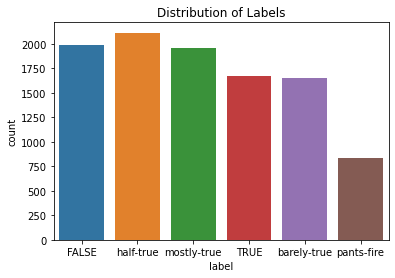

In [3]:
#Checking the structure and basic statistics of the dataset
DataSet.head()
DataSet.info()
DataSet.describe()

#Checking the distribution of the target variable
sns.countplot(DataSet['label'])
plt.title('Distribution of Labels')
plt.show()

#### Data Cleaning and Preprocessing

In [4]:
#Filling missing values, if any
DataSet = DataSet.fillna('')
DataSet

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,sentiment_score,sentiment_magnitude,anger,fear,joy,disgust,sad,speaker_id,list,sentiment_code
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,...,-0.5,0.5,0.121137,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,...,-0.4,0.8,0.095352,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,...,-0.3,0.3,0.039559,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7,19,...,-0.3,0.3,0.004804,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15,9,...,0.0,0.0,0.044237,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,,Florida,none,0,1,...,-0.6,0.6,0.354176,0.290966,0.020772,0.176219,0.216899,_1054_,"[1, 0]",_NEG_
10232,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,,Georgia,republican,0,0,...,0.0,0.0,0.189920,0.077568,0.050404,0.196092,0.410885,_2910_,"[1, 0]",
10233,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,,Georgia,republican,4,11,...,-0.4,0.4,0.119778,0.206043,0.152902,0.095003,0.220693,_540_,"[0, 1]",_NEG_
10234,2253.json,FALSE,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,,Florida,democrat,3,1,...,0.0,0.0,0.113820,0.066778,0.312947,0.242768,0.084354,_376_,"[0, 1]",


In [5]:
#Performing text cleaning and preprocessing
import re

def preprocess_text(text):
    
    #Removing special characters and symbols
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    
    #Converting text to lowercase
    text = text.lower()
    
    #Removing extra whitespaces
    text = re.sub(r"\s+", " ", text)
    
    #Other preprocessing steps (if any)
    
    return text

DataSet['statement'] = DataSet['statement'].apply(preprocess_text)

In [6]:
#Encoding the target variable 'label' using LabelEncoder
LabelEncoder = LabelEncoder()
DataSet['label'] = LabelEncoder.fit_transform(DataSet['label'])

In [7]:
#Splitting the dataset into train and test sets
X = DataSet['statement']
Y = DataSet['label']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Feature Extraction

In [8]:
#Performing text vectorization
Vectorizer = TfidfVectorizer()
X_Train = Vectorizer.fit_transform(X_Train)
X_Test = Vectorizer.transform(X_Test)

#### Model Training and Evaluation

In [9]:
#Creating and training the Linear Regression model
LRModel = LinearRegression()
LRModel.fit(X_Train, Y_Train)

LinearRegression()

In [10]:
#Making predictions on the testing set
Y_Pred = LRModel.predict(X_Test)

In [11]:
#Evaluating the model
MSE = mean_squared_error(Y_Test, Y_Pred)
R2 = r2_score(Y_Test, Y_Pred)

print("Mean Squared Error:", MSE)
print("R-squared:", R2)

Mean Squared Error: 122.7628733301333
R-squared: -48.74403274362117


In [12]:
#Saving the trained model for future use
joblib.dump(LRModel, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

#### Bar Plot: Visualize the distribution of sentiments in the dataset

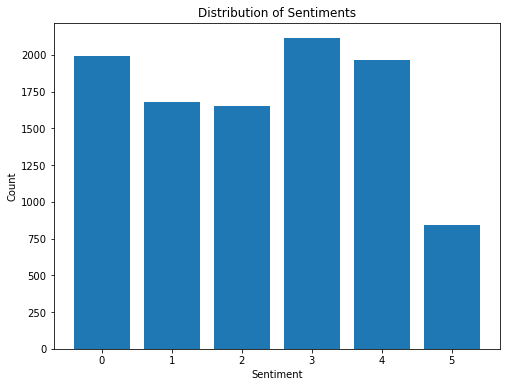

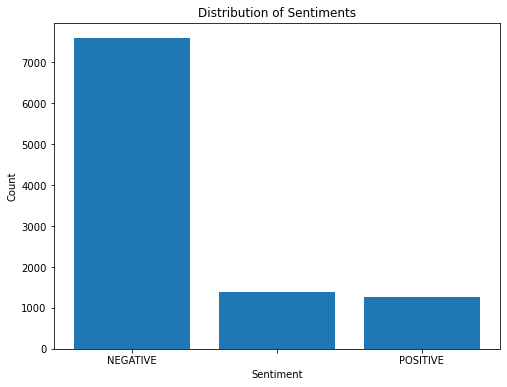

In [13]:
SentimentCounts = DataSet['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(SentimentCounts.index, SentimentCounts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

#Counting the number of occurrences for each sentiment
SentimentCounts = DataSet['sentiment'].value_counts()

#Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(SentimentCounts.index, SentimentCounts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

#### Heatmap: Visualize the correlation between different sentiment categories

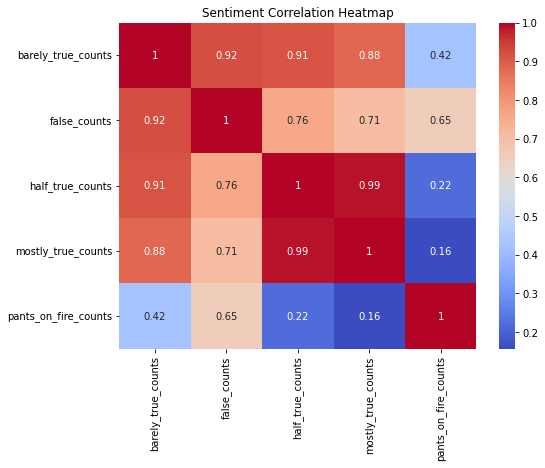

In [14]:
SentimentCorr = DataSet[['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(SentimentCorr, annot=True, cmap='coolwarm')
plt.title('Sentiment Correlation Heatmap')
plt.show()

#### Stacked Bar Plot: Compare the distribution of sentiments across different categories

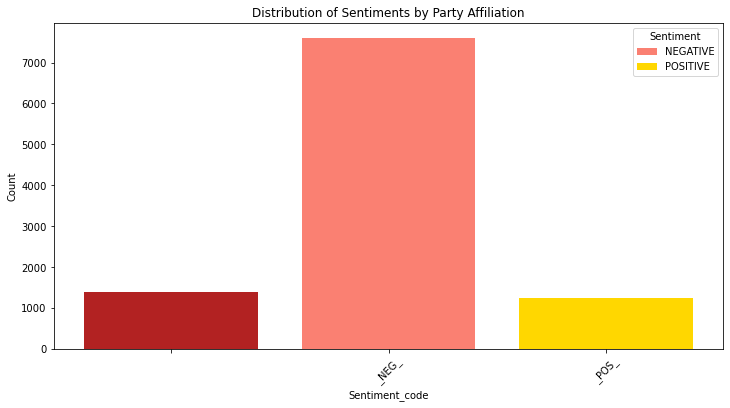

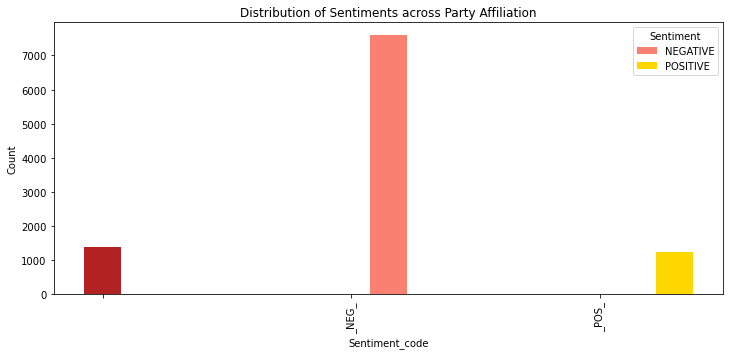

In [15]:
#Grouping the dataset by party sentiment_code and sentiment
GroupedData = DataSet.groupby(['sentiment_code', 'sentiment']).size().unstack()

plt.figure(figsize=(12, 6))
Colors = ['firebrick', 'salmon', 'gold', 'limegreen', 'darkgreen']
Sentiments = GroupedData.columns

for i, sentiment in enumerate(Sentiments):
    plt.bar(GroupedData.index, GroupedData[sentiment], label=sentiment, color=Colors[i])

plt.xlabel('Sentiment_code')
plt.ylabel('Count')
plt.title('Distribution of Sentiments by Party Affiliation')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.show()

#Grouping the dataset by party sentiment_code and sentiment
GroupedData = DataSet.groupby(['sentiment_code', 'sentiment']).size().unstack()

#Creating a stacked bar plot
labels = GroupedData.index
x = np.arange(len(labels))
width = 0.15

plt.figure(figsize=(12, 6))
Colors = ['firebrick', 'salmon', 'gold', 'limegreen', 'darkgreen']
Sentiments = GroupedData.columns

for i, sentiment in enumerate(Sentiments):
    plt.bar(x + (i * width), GroupedData[sentiment], width, label=sentiment, color=Colors[i])

plt.xlabel('Sentiment_code')
plt.ylabel('Count')
plt.title('Distribution of Sentiments across Party Affiliation')
plt.xticks(x, labels, rotation='vertical')  #Rotating the x-axis labels
plt.subplots_adjust(bottom=0.25)  #Adjusting the bottom spacing to avoid overlapping labels
plt.legend(title='Sentiment')
plt.show()

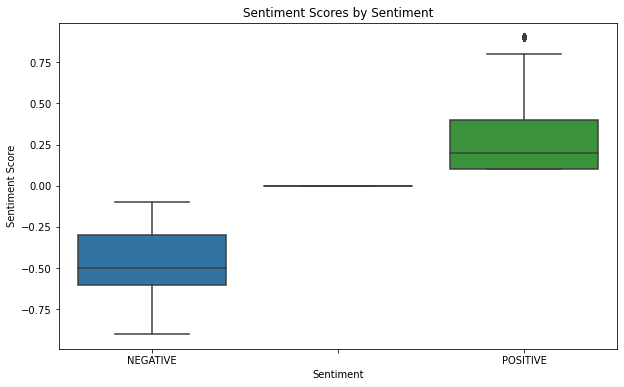

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='sentiment_score', data=DataSet)
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores by Sentiment')
plt.show()

#### Pie Chart: Show the proportion of each sentiment category in the dataset

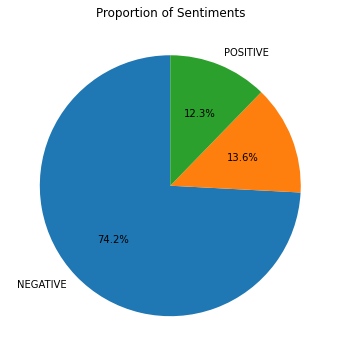

In [17]:
#Counting the number of occurrences for each sentiment
SentimentCounts = DataSet['sentiment'].value_counts()

#Creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(SentimentCounts.values, labels=SentimentCounts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sentiments')
plt.show()

#### Residual Plot: Comparison between actual values and predicted values

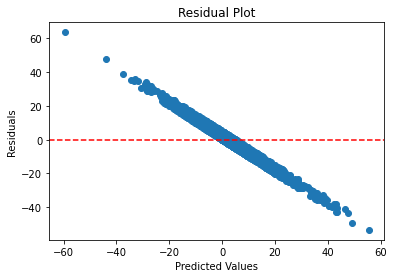

In [18]:
residuals = Y_Test - Y_Pred
plt.scatter(Y_Pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()